In [32]:
import sys
sys.path.append('..')
from stixdcpy.quicklook import LightCurves as api
import numpy as np
import pandas as pd
import requests
import scipy 
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib notebook

In [97]:
res= api.fetch('2021-09-06T10:30:00','2021-09-06T13:00:00')
#res.info()


<IPython.core.display.Javascript object>


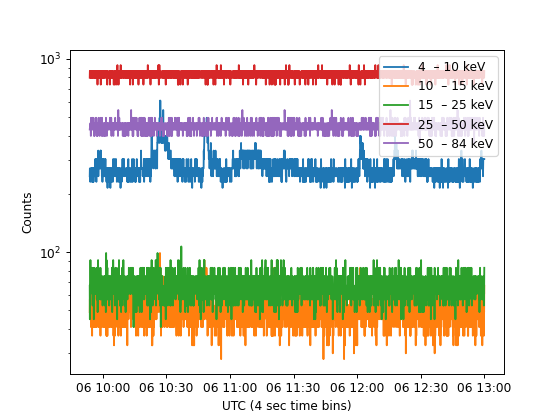

In [98]:
res.peek()


In [99]:
res.data['lightcurves'][0]

KeyError: 'lightcurves'

<IPython.core.display.Javascript object>


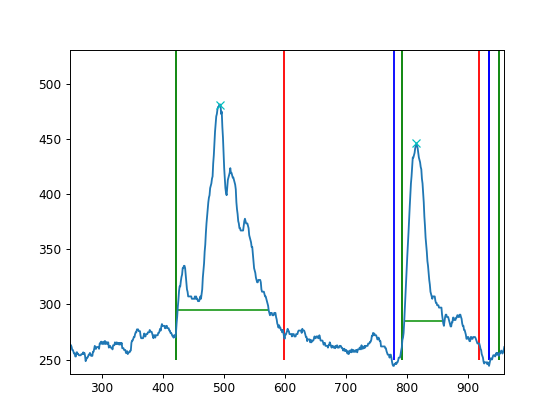

(array([ 86.84848485, 149.3       ,  63.52391304, 283.28      ,
       134.89285714,  68.3       ,  86.33333333,  13.25      ]), array([260.76      , 294.68      , 284.65333333, 262.89333333,
       266.73333333, 266.73333333, 266.30666667, 285.93333333]), array([  24.53333333,  424.65      ,  796.02608696,  992.16      ,
       1335.85714286, 1895.2       , 2136.6       , 2759.        ]), array([ 111.38181818,  573.95      ,  859.55      , 1275.44      ,
       1470.75      , 1963.5       , 2222.93333333, 2772.25      ])) {'peak_heights': array([296.6       , 481.13333333, 445.93333333, 330.73333333,
       305.13333333, 356.33333333, 332.86666667, 292.33333333]), 'prominences': array([ 44.8       , 233.06666667, 201.6       ,  84.8       ,
        48.        , 112.        ,  83.2       ,   8.        ]), 'left_bases': array([  16,  209,  779,  935, 1284,  935, 1988, 2710]), 'right_bases': array([ 209, 2710, 2710, 1809, 1809, 2710, 2710, 2773]), 'widths': array([ 96.33333333, 177.5625 

In [135]:
#plt.clf()

from scipy import signal 

roll=lambda a, n : np.convolve(a,np.ones(n,dtype='float')/n, 'same')[n//2:-n//2+1]  




fig = plt.figure()
ydata=roll(np.array(res.data['light_curves']['0']), 15)

xpeak,pro=signal.find_peaks(ydata, width=10, distance=200, height=280, rel_height=0.9)
half = signal.peak_widths(ydata, xpeak, rel_height=0.8)
print(half,pro)

plt.plot(ydata)
print(xpeak)
plt.plot(xpeak,ydata[xpeak],'x',color='c')
plt.vlines(pro['left_bases'], 250, 600,'b')
plt.vlines(pro['right_bases'], 250, 600,'b')
plt.vlines(pro['left_ips'], 250, 700,'g')
plt.vlines(pro['right_ips'], 250, 700, 'r')
plt.hlines(*half[1:], color="C2")

plt.show()

In [136]:

np.vstack((half[2],half[3])).T

array([[  24.53333333,  111.38181818],
       [ 424.65      ,  573.95      ],
       [ 796.02608696,  859.55      ],
       [ 992.16      , 1275.44      ],
       [1335.85714286, 1470.75      ],
       [1895.2       , 1963.5       ],
       [2136.6       , 2222.93333333],
       [2759.        , 2772.25      ]])

In [ ]:
def get_lightcurves(start, end):
    res= api.fetch(start,end,'lc',False)
    if not res:
        return None
    df= pd.DataFrame.from_records(res[1].data['COUNTS'])
    return df

In [ ]:
flare_df={}
margin_seconds=900
for fl in flare_data:
    start_unix=float(fl['start_unix_time'])
    duration=float(fl['duration'])
    start_dt=datetime.utcfromtimestamp(start_unix-margin_seconds)
    end_dt=datetime.utcfromtimestamp(start_unix+duration+margin_seconds)
    df=get_lightcurves(start_dt,end_dt)
    flare_df[fl['_id']]=df
    

In [ ]:
def find_peaks(df, fid,  lc_index=0):
    fig = plt.figure()
    ydata=df.loc[:,lc_index]
    xpeak,_=scipy.signal.find_peaks(ydata, width=10, distance=200)
    plt.plot(ydata)
    plt.title=f'flare:{fid}'
    plt.ylim(0.8*min(ydata),1.2*max(ydata))
    plt.vlines(xpeak,ydata[xpeak]*0.9, ydata[xpeak]*1.1, color='C1')#, 'x')
    plt.show()
    
for fid,df in flare_df.items():
    if df is not None:
        find_peaks(df, fid, lc_index=0)
    